# AutoRec: AutoEncoders Meet Collaborative Filtering

---

## Introduction

Collaborative Filtering은 user의 item에 대한 선호도를 반영하기 위한  modeld이다.

그리고 본 paper는 **AutoEncoder**를 이용하여 새로운 Collaborative Filtering model을 구현한다.

---

## The AutoRec Model
rating-based CF에서는 user-item rating matrix $R$을 다음과 같이 표현 할 수 있다.

* each user's data - **partially observed vector: $r^u$** = $(R_{u1}, R_{u2}, ... , R_{un})$
* each item's data - **partially observed vector: $r^i$** = $(R_{1i}, R_{2i}, ... , R_{mi})$

#### Aim of this work
To design **item-based(or user-based) autoencoder** $\leftarrow$ 각각의 partially observed vector를 input으로 가짐

#### Formulation
$$h(r;\theta) = f(W*g(Vr + \mu) + b)$$

* $f(), g()$: activation functions
* $W, V$ / $\mu, b$: parameters and biases

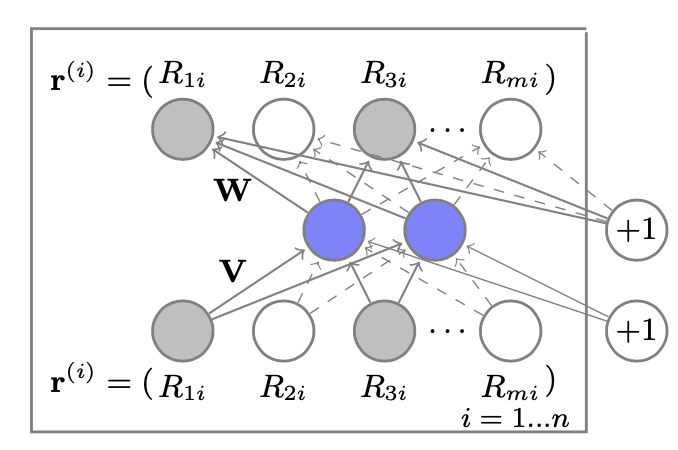

In [3]:
from PIL import Image
Image.open('Image/autorec_model.png')

#### Model Structure
위의 그림을 Item-based AutoRec model이라고 하자.

Input으로 set of **partially observed item vectors**를 받아, 한번에 하나씩 학습시킨다. 이 때 2가지 유의점이 있다.
* $r^i$는 **partially** obeserved이다. 즉, m명의 user에 대한 데이터가 존재하는 것이 아닌, 일부의 데이터만 존재한다. 따라서, back prop.과 parameter updating도 일부 node에 대해서만 진행된다. 예를 들어, 위의 그림의 경우, $r^i$는 $R_{1i}, R_{3i}$의 값만 가지고 있다. 따라서, Input과 Output 모두에서 1번과 3번 노드만 활성화 되어있고, 해당 노드와 연결된 아크들만 활성화되어있다.
* overfitting을 방지하기 위해 regulariaztion이 존재한다. 따라서, 전체 모델의 formulation은 다음과 같다. 
$$min \sum_{i=1}^{n} \mid r^i - h(r^i;\theta)  \mid ^2 + {\lambda \over 2}*(\mid\mid W \mid\mid _F^2 + \mid\mid V \mid\mid _F^2) $$